# CMI - Detect Behavior with Sensor Data [🔗](https://www.kaggle.com/competitions/cmi-detect-behavior-with-sensor-data/overview)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

## Demographics Data

In [3]:
# Read demographics Data
df_demo = pd.read_csv('./data/train_demographics.csv')
df_demo

,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
0,SUBJ_000206,1,41,1,1,172.0,50,25.0
1,SUBJ_001430,0,11,0,1,167.0,51,27.0
2,SUBJ_002923,1,28,1,0,164.0,54,26.0
3,SUBJ_003328,1,33,1,1,171.0,52,25.0
4,SUBJ_004117,0,15,0,1,184.0,54,28.0
...,...,...,...,...,...,...,...,...
76,SUBJ_063319,1,25,1,1,173.0,50,29.0
77,SUBJ_063346,1,42,1,1,183.0,51,26.0
78,SUBJ_063447,1,36,0,1,175.0,54,25.0
79,SUBJ_063464,0,15,0,1,162.0,43,23.0


In [4]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject               81 non-null     object 
 1   adult_child           81 non-null     int64  
 2   age                   81 non-null     int64  
 3   sex                   81 non-null     int64  
 4   handedness            81 non-null     int64  
 5   height_cm             81 non-null     float64
 6   shoulder_to_wrist_cm  81 non-null     int64  
 7   elbow_to_wrist_cm     81 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.2+ KB


In [5]:
df_demo.describe()

,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.518519,21.814815,0.617284,0.876543,167.993827,51.580247,25.469136
std,0.502770,10.289693,0.489078,0.331010,10.605863,4.888415,3.025254
min,0.000000,10.000000,0.000000,0.000000,135.000000,41.000000,18.000000
25%,0.000000,13.000000,0.000000,1.000000,163.000000,49.000000,24.000000
50%,1.000000,22.000000,1.000000,1.000000,170.000000,52.000000,25.000000
75%,1.000000,27.000000,1.000000,1.000000,174.000000,55.000000,27.000000
max,1.000000,53.000000,1.000000,1.000000,190.500000,71.000000,44.000000


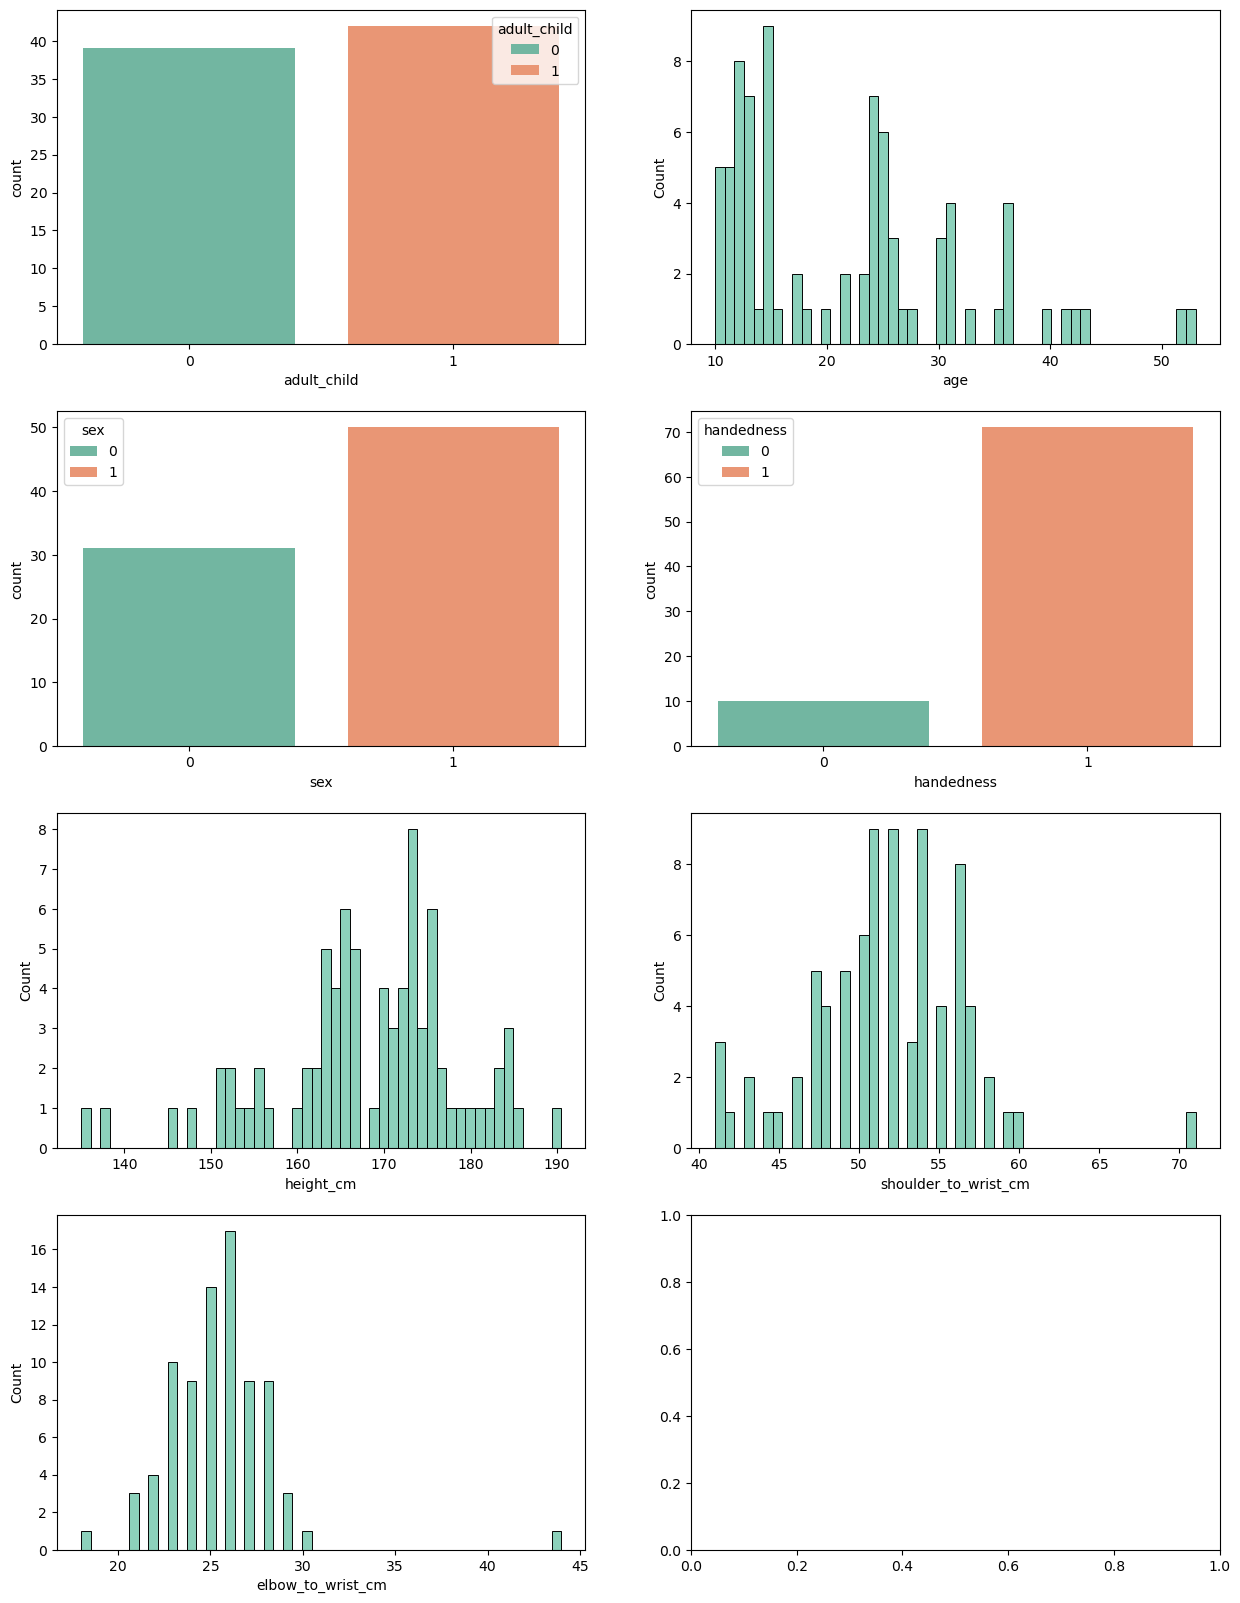

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, col in enumerate(df_demo.columns[1:]):
    r = i // 2
    c = i % 2
    if df_demo[col].nunique() == 2:
        sns.countplot(data=df_demo, x=col, ax=axes[r][c], hue=col)
    else:
        sns.histplot(data=df_demo, x=col, ax=axes[r][c], bins=50)  

- adult > child
- child younger than 15 > child older than 15
- male > female
- right-handedness >>> left-handedness
- `shoulder_to_wrist_cm` and `elbow_to_wrist_cm` have anomaly data

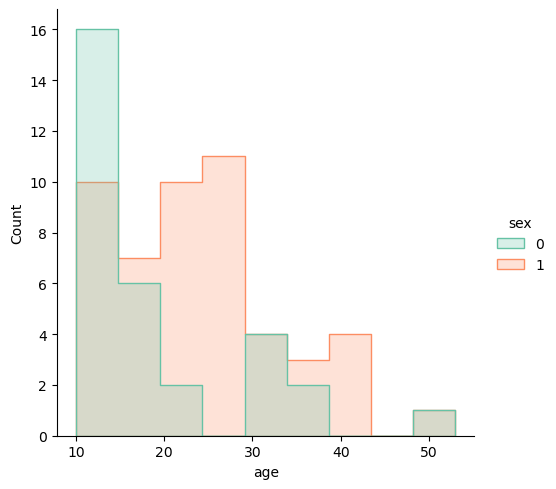

In [8]:
# Distribution of 'age' regarding 'sex'
sns.displot(data=df_demo, x='age', hue='sex', binwidth=5, element='step')
plt.show()

- 10-15: female > male

In [10]:
# Anomaly data
df_demo.loc[df_demo['shoulder_to_wrist_cm'] > 60]

,subject,adult_child,age,sex,handedness,height_cm,shoulder_to_wrist_cm,elbow_to_wrist_cm
7,SUBJ_011323,1,30,0,1,175.0,71,44.0


- `shoulder_to_wrist_cm` and `elbow_to_wrist_cm` too long. [(Anthropometric data from North Carolina State University)](https://multisite.eos.ncsu.edu/www-ergocenter-ncsu-edu/wp-content/uploads/sites/18/2016/06/Anthropometric-Detailed-Data-Tables.pdf)
  => Might need to delete the subject

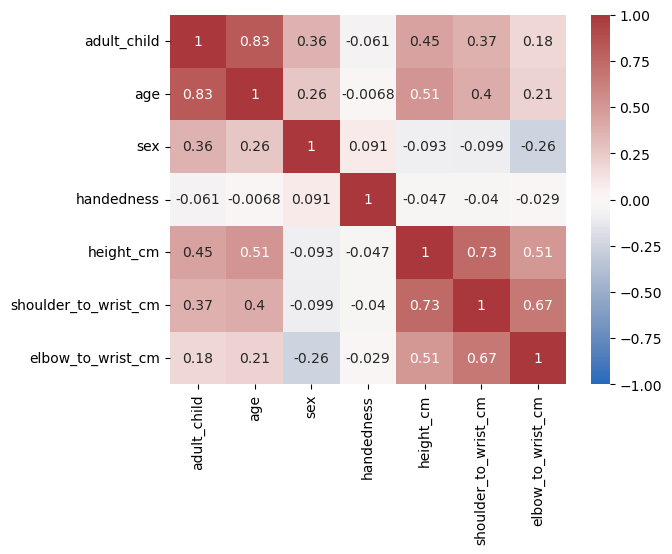

In [12]:
# Correlation matrix
sns.heatmap(df_demo[df_demo.columns[1:]].corr(), annot=True, vmin=-1, vmax=1, cmap='vlag')
plt.show()

- adult_child & age: 0.83 => Use just one of them
- age & height: 0.51
- height_cm & shoulder_to_wrist_cm: 0.73
- height_cm & elbow_to_wrist_cm: 0.51
- shoulder_to_wrist_cm & elbow_to_wrist_cm: 0.67

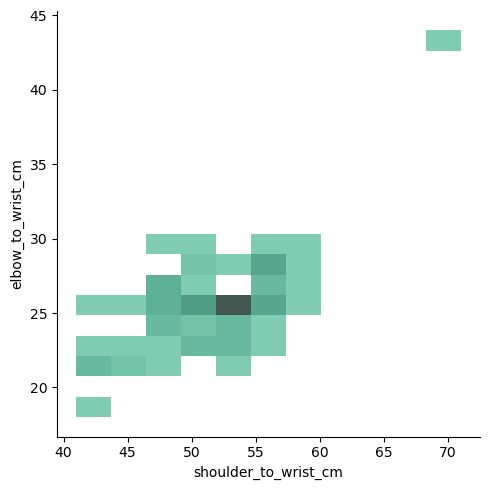

In [14]:
sns.displot(data=df_demo, x='shoulder_to_wrist_cm', y='elbow_to_wrist_cm')

## Main data

In [16]:
# Read data
df = pd.read_csv('./data/train.csv')
df

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,thm_3,thm_4,thm_5,tof_1_v0,tof_1_v1,tof_1_v2,tof_1_v3,tof_1_v4,tof_1_v5,tof_1_v6,tof_1_v7,tof_1_v8,tof_1_v9,tof_1_v10,tof_1_v11,tof_1_v12,tof_1_v13,tof_1_v14,tof_1_v15,tof_1_v16,tof_1_v17,tof_1_v18,tof_1_v19,tof_1_v20,tof_1_v21,tof_1_v22,tof_1_v23,tof_1_v24,tof_1_v25,tof_1_v26,tof_1_v27,tof_1_v28,tof_1_v29,tof_1_v30,tof_1_v31,tof_1_v32,tof_1_v33,tof_1_v34,tof_1_v35,tof_1_v36,tof_1_v37,tof_1_v38,tof_1_v39,tof_1_v40,tof_1_v41,tof_1_v42,tof_1_v43,tof_1_v44,tof_1_v45,tof_1_v46,tof_1_v47,tof_1_v48,tof_1_v49,tof_1_v50,tof_1_v51,tof_1_v52,tof_1_v53,tof_1_v54,tof_1_v55,tof_1_v56,tof_1_v57,tof_1_v58,tof_1_v59,tof_1_v60,tof_1_v61,tof_1_v62,tof_1_v63,tof_2_v0,tof_2_v1,tof_2_v2,tof_2_v3,tof_2_v4,tof_2_v5,tof_2_v6,tof_2_v7,tof_2_v8,tof_2_v9,tof_2_v10,tof_2_v11,tof_2_v12,tof_2_v13,tof_2_v14,tof_2_v15,tof_2_v16,tof_2_v17,tof_2_v18,tof_2_v19,tof_2_v20,tof_2_v21,tof_2_v22,tof_2_v23,tof_2_v24,tof_2_v25,tof_2_v26,tof_2_v27,tof_2_v28,tof_2_v29,tof_2_v30,tof_2_v31,tof_2_v32,tof_2_v33,tof_2_v34,tof_2_v35,tof_2_v36,tof_2_v37,tof_2_v38,tof_2_v39,tof_2_v40,tof_2_v41,tof_2_v42,tof_2_v43,tof_2_v44,tof_2_v45,tof_2_v46,tof_2_v47,tof_2_v48,tof_2_v49,tof_2_v50,tof_2_v51,tof_2_v52,tof_2_v53,tof_2_v54,tof_2_v55,tof_2_v56,tof_2_v57,tof_2_v58,tof_2_v59,tof_2_v60,tof_2_v61,tof_2_v62,tof_2_v63,tof_3_v0,tof_3_v1,tof_3_v2,tof_3_v3,tof_3_v4,tof_3_v5,tof_3_v6,tof_3_v7,tof_3_v8,tof_3_v9,tof_3_v10,tof_3_v11,tof_3_v12,tof_3_v13,tof_3_v14,tof_3_v15,tof_3_v16,tof_3_v17,tof_3_v18,tof_3_v19,tof_3_v20,tof_3_v21,tof_3_v22,tof_3_v23,tof_3_v24,tof_3_v25,tof_3_v26,tof_3_v27,tof_3_v28,tof_3_v29,tof_3_v30,tof_3_v31,tof_3_v32,tof_3_v33,tof_3_v34,tof_3_v35,tof_3_v36,tof_3_v37,tof_3_v38,tof_3_v39,tof_3_v40,tof_3_v41,tof_3_v42,tof_3_v43,tof_3_v44,tof_3_v45,tof_3_v46,tof_3_v47,tof_3_v48,tof_3_v49,tof_3_v50,tof_3_v51,tof_3_v52,tof_3_v53,tof_3_v54,tof_3_v55,tof_3_v56,tof_3_v57,tof_3_v58,tof_3_v59,tof_3_v60,tof_3_v61,tof_3_v62,tof_3_v63,tof_4_v0,tof_4_v1,tof_4_v2,tof_4_v3,tof_4_v4,tof_4_v5,tof_4_v6,tof_4_v7,tof_4_v8,tof_4_v9,tof_4_v10,tof_4_v11,tof_4_v12,tof_4_v13,tof_4_v14,tof_4_v15,tof_4_v16,tof_4_v17,tof_4_v18,tof_4_v19,tof_4_v20,tof_4_v21,tof_4_v22,tof_4_v23,tof_4_v24,tof_4_v25,tof_4_v26,tof_4_v27,tof_4_v28,tof_4_v29,tof_4_v30,tof_4_v31,tof_4_v32,tof_4_v33,tof_4_v34,tof_4_v35,tof_4_v36,tof_4_v37,tof_4_v38,tof_4_v39,tof_4_v40,tof_4_v41,tof_4_v42,tof_4_v43,tof_4_v44,tof_4_v45,tof_4_v46,tof_4_v47,tof_4_v48,tof_4_v49,tof_4_v50,tof_4_v51,tof_4_v52,tof_4_v53,tof_4_v54,tof_4_v55,tof_4_v56,tof_4_v57,tof_4_v58,tof_4_v59,tof_4_v60,tof_4_v61,tof_4_v62,tof_4_v63,tof_5_v0,tof_5_v1,tof_5_v2,tof_5_v3,tof_5_v4,tof_5_v5,tof_5_v6,tof_5_v7,tof_5_v8,tof_5_v9,tof_5_v10,tof_5_v11,tof_5_v12,tof_5_v13,tof_5_v14,tof_5_v15,tof_5_v16,tof_5_v17,tof_5_v18,tof_5_v19,tof_5_v20,tof_5_v21,tof_5_v22,tof_5_v23,tof_5_v24,tof_5_v25,tof_5_v26,tof_5_v27,tof_5_v28,tof_5_v29,tof_5_v30,tof_5_v31,tof_5_v32,tof_5_v33,tof_5_v34,tof_5_v35,tof_5_v36,tof_5_v37,tof_5_v38,tof_5_v39,tof_5_v40,tof_5_v41,tof_5_v42,tof_5_v43,tof_5_v44,tof_5_v45,tof_5_v46,tof_5_v47,tof_5_v48,tof_5_v49,tof_5_v50,tof_5_v51,tof_5_v52,tof_5_v53,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,6.214844,3.355469,0.134399,-0.355164,-0.447327,-0.809753,28.943842,31.822186,29.553024,28.592863,28.310535,131.0,134.0,132.0,135.0,98.0,74.0,64.0,60.0,-1.0,-1.0,152.0,153.0,141.0,89.0,68.0,63.0,-1.0,-1.0,-1.0,-1.0,169.0,118.0,86.0,73.0,-1.0,-1.0,-1.0,-1.0,-1.0,147.0,110.0,87.0,126.0,-1.0,-1.0,-1.0,-1.0,-1.0,137.0,108.0,115.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,128.0,110.0,129.0,140.0,-1.0,126.0,131.0,-1.0,-1.0,-1.0,108.0,122.0,139.0,113.0,121.0,-1.0,118.0,96.0,-1.0,-1.0,-1.0,-1.0,165.0,124.0,100.0,102.0,119.0,-1.0,-1.0,

In [17]:
# info
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Data columns (total 341 columns):
 #    Column            Non-Null Count   Dtype  
---   ------            --------------   -----  
 0    row_id            574945 non-null  object 
 1    sequence_type     574945 non-null  object 
 2    sequence_id       574945 non-null  object 
 3    sequence_counter  574945 non-null  int64  
 4    subject           574945 non-null  object 
 5    orientation       574945 non-null  object 
 6    behavior          574945 non-null  object 
 7    phase             574945 non-null  object 
 8    gesture           574945 non-null  object 
 9    acc_x             574945 non-null  float64
 10   acc_y             574945 non-null  float64
 11   acc_z             574945 non-null  float64
 12   rot_w             571253 non-null  float64
 13   rot_x             571253 non-null  float64
 14   rot_y             571253 non-null  float64
 15   rot_z             571253 non-null  float64
 16   

- Null values
    - 'rot_w', 'rot_x', 'rot_y', 'rot_z'
    - 'thm_1', 'thm_2', 'thm_3', 'thm_4', 'thm_5'
    - 'tof_1_v0'~ 'tof_4_v63'
    - 'tof_5_v0'~'tof_5_v63'

In [19]:
# descriptive statistics (numeric)
df.describe()

,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,thm_3,thm_4,thm_5,tof_1_v0,tof_1_v1,tof_1_v2,tof_1_v3,tof_1_v4,tof_1_v5,tof_1_v6,tof_1_v7,tof_1_v8,tof_1_v9,tof_1_v10,tof_1_v11,tof_1_v12,tof_1_v13,tof_1_v14,tof_1_v15,tof_1_v16,tof_1_v17,tof_1_v18,tof_1_v19,tof_1_v20,tof_1_v21,tof_1_v22,tof_1_v23,tof_1_v24,tof_1_v25,tof_1_v26,tof_1_v27,tof_1_v28,tof_1_v29,tof_1_v30,tof_1_v31,tof_1_v32,tof_1_v33,tof_1_v34,tof_1_v35,tof_1_v36,tof_1_v37,tof_1_v38,tof_1_v39,tof_1_v40,tof_1_v41,tof_1_v42,tof_1_v43,tof_1_v44,tof_1_v45,tof_1_v46,tof_1_v47,tof_1_v48,tof_1_v49,tof_1_v50,tof_1_v51,tof_1_v52,tof_1_v53,tof_1_v54,tof_1_v55,tof_1_v56,tof_1_v57,tof_1_v58,tof_1_v59,tof_1_v60,tof_1_v61,tof_1_v62,tof_1_v63,tof_2_v0,tof_2_v1,tof_2_v2,tof_2_v3,tof_2_v4,tof_2_v5,tof_2_v6,tof_2_v7,tof_2_v8,tof_2_v9,tof_2_v10,tof_2_v11,tof_2_v12,tof_2_v13,tof_2_v14,tof_2_v15,tof_2_v16,tof_2_v17,tof_2_v18,tof_2_v19,tof_2_v20,tof_2_v21,tof_2_v22,tof_2_v23,tof_2_v24,tof_2_v25,tof_2_v26,tof_2_v27,tof_2_v28,tof_2_v29,tof_2_v30,tof_2_v31,tof_2_v32,tof_2_v33,tof_2_v34,tof_2_v35,tof_2_v36,tof_2_v37,tof_2_v38,tof_2_v39,tof_2_v40,tof_2_v41,tof_2_v42,tof_2_v43,tof_2_v44,tof_2_v45,tof_2_v46,tof_2_v47,tof_2_v48,tof_2_v49,tof_2_v50,tof_2_v51,tof_2_v52,tof_2_v53,tof_2_v54,tof_2_v55,tof_2_v56,tof_2_v57,tof_2_v58,tof_2_v59,tof_2_v60,tof_2_v61,tof_2_v62,tof_2_v63,tof_3_v0,tof_3_v1,tof_3_v2,tof_3_v3,tof_3_v4,tof_3_v5,tof_3_v6,tof_3_v7,tof_3_v8,tof_3_v9,tof_3_v10,tof_3_v11,tof_3_v12,tof_3_v13,tof_3_v14,tof_3_v15,tof_3_v16,tof_3_v17,tof_3_v18,tof_3_v19,tof_3_v20,tof_3_v21,tof_3_v22,tof_3_v23,tof_3_v24,tof_3_v25,tof_3_v26,tof_3_v27,tof_3_v28,tof_3_v29,tof_3_v30,tof_3_v31,tof_3_v32,tof_3_v33,tof_3_v34,tof_3_v35,tof_3_v36,tof_3_v37,tof_3_v38,tof_3_v39,tof_3_v40,tof_3_v41,tof_3_v42,tof_3_v43,tof_3_v44,tof_3_v45,tof_3_v46,tof_3_v47,tof_3_v48,tof_3_v49,tof_3_v50,tof_3_v51,tof_3_v52,tof_3_v53,tof_3_v54,tof_3_v55,tof_3_v56,tof_3_v57,tof_3_v58,tof_3_v59,tof_3_v60,tof_3_v61,tof_3_v62,tof_3_v63,tof_4_v0,tof_4_v1,tof_4_v2,tof_4_v3,tof_4_v4,tof_4_v5,tof_4_v6,tof_4_v7,tof_4_v8,tof_4_v9,tof_4_v10,tof_4_v11,tof_4_v12,tof_4_v13,tof_4_v14,tof_4_v15,tof_4_v16,tof_4_v17,tof_4_v18,tof_4_v19,tof_4_v20,tof_4_v21,tof_4_v22,tof_4_v23,tof_4_v24,tof_4_v25,tof_4_v26,tof_4_v27,tof_4_v28,tof_4_v29,tof_4_v30,tof_4_v31,tof_4_v32,tof_4_v33,tof_4_v34,tof_4_v35,tof_4_v36,tof_4_v37,tof_4_v38,tof_4_v39,tof_4_v40,tof_4_v41,tof_4_v42,tof_4_v43,tof_4_v44,tof_4_v45,tof_4_v46,tof_4_v47,tof_4_v48,tof_4_v49,tof_4_v50,tof_4_v51,tof_4_v52,tof_4_v53,tof_4_v54,tof_4_v55,tof_4_v56,tof_4_v57,tof_4_v58,tof_4_v59,tof_4_v60,tof_4_v61,tof_4_v62,tof_4_v63,tof_5_v0,tof_5_v1,tof_5_v2,tof_5_v3,tof_5_v4,tof_5_v5,tof_5_v6,tof_5_v7,tof_5_v8,tof_5_v9,tof_5_v10,tof_5_v11,tof_5_v12,tof_5_v13,tof_5_v14,tof_5_v15,tof_5_v16,tof_5_v17,tof_5_v18,tof_5_v19,tof_5_v20,tof_5_v21,tof_5_v22,tof_5_v23,tof_5_v24,tof_5_v25,tof_5_v26,tof_5_v27,tof_5_v28,tof_5_v29,tof_5_v30,tof_5_v31,tof_5_v32,tof_5_v33,tof_5_v34,tof_5_v35,tof_5_v36,tof_5_v37,tof_5_v38,tof_5_v39,tof_5_v40,tof_5_v41,tof_5_v42,tof_5_v43,tof_5_v44,tof_5_v45,tof_5_v46,tof_5_v47,tof_5_v48,tof_5_v49,tof_5_v50,tof_5_v51,tof_5_v52,tof_5_v53,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
count,574945.000000,574945.000000,574945.000000,574945.000000,571253.000000,571253.000000,571253.000000,571253.000000,567958.000000,567307.000000,568473.000000,568721.000000,541659.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.000000,568721.00000

In [20]:
# descriptive statistics (object)
df.describe(include='O')

,row_id,sequence_type,sequence_id,subject,orientation,behavior,phase,gesture
count,574945,574945,574945,574945,574945,574945,574945,574945
unique,574945,2,8151,81,4,4,2,18
top,SEQ_000007_000000,Target,SEQ_015261,SUBJ_040733,Seated Straight,Performs gesture,Transition,Text on phone
freq,1,344058,700,10848,188120,255817,319128,58462


In [21]:
# number of unique sequence_id by each gesture
df.groupby('gesture')['sequence_id'].nunique().sort_values(ascending=False)

gesture
Neck - pinch skin                             640
Forehead - pull hairline                      640
Text on phone                                 640
Neck - scratch                                640
Eyelash - pull hair                           640
Forehead - scratch                            640
Above ear - pull hair                         638
Eyebrow - pull hair                           638
Cheek - pinch skin                            637
Wave hello                                    478
Pull air toward your face                     477
Write name in air                             477
Feel around in tray and pull out an object    161
Glasses on/off                                161
Pinch knee/leg skin                           161
Scratch knee/leg skin                         161
Drink from bottle/cup                         161
Write name on leg                             161
Name: sequence_id, dtype: int64

In [26]:
# every subject has performed 18 gestures
df.groupby('subject')['gesture'].nunique().sort_values(ascending=False)

subject
SUBJ_000206    18
SUBJ_038277    18
SUBJ_049223    18
SUBJ_047636    18
SUBJ_045235    18
               ..
SUBJ_027671    18
SUBJ_026824    18
SUBJ_026460    18
SUBJ_024825    18
SUBJ_064387    18
Name: gesture, Length: 81, dtype: int64

In [27]:
# sequence_id is unique for each subject(no subject shares sequence_id)
df.groupby('subject')['sequence_id'].nunique().sort_values(ascending=False).tail(7)

subject
SUBJ_026460    102
SUBJ_024825    102
SUBJ_011323    101
SUBJ_016552     97
SUBJ_038023     96
SUBJ_053217     54
SUBJ_036405     51
Name: sequence_id, dtype: int64

In [205]:
# Objective columns
columns_obj = df.describe(include='O').columns
len(columns_obj)

8

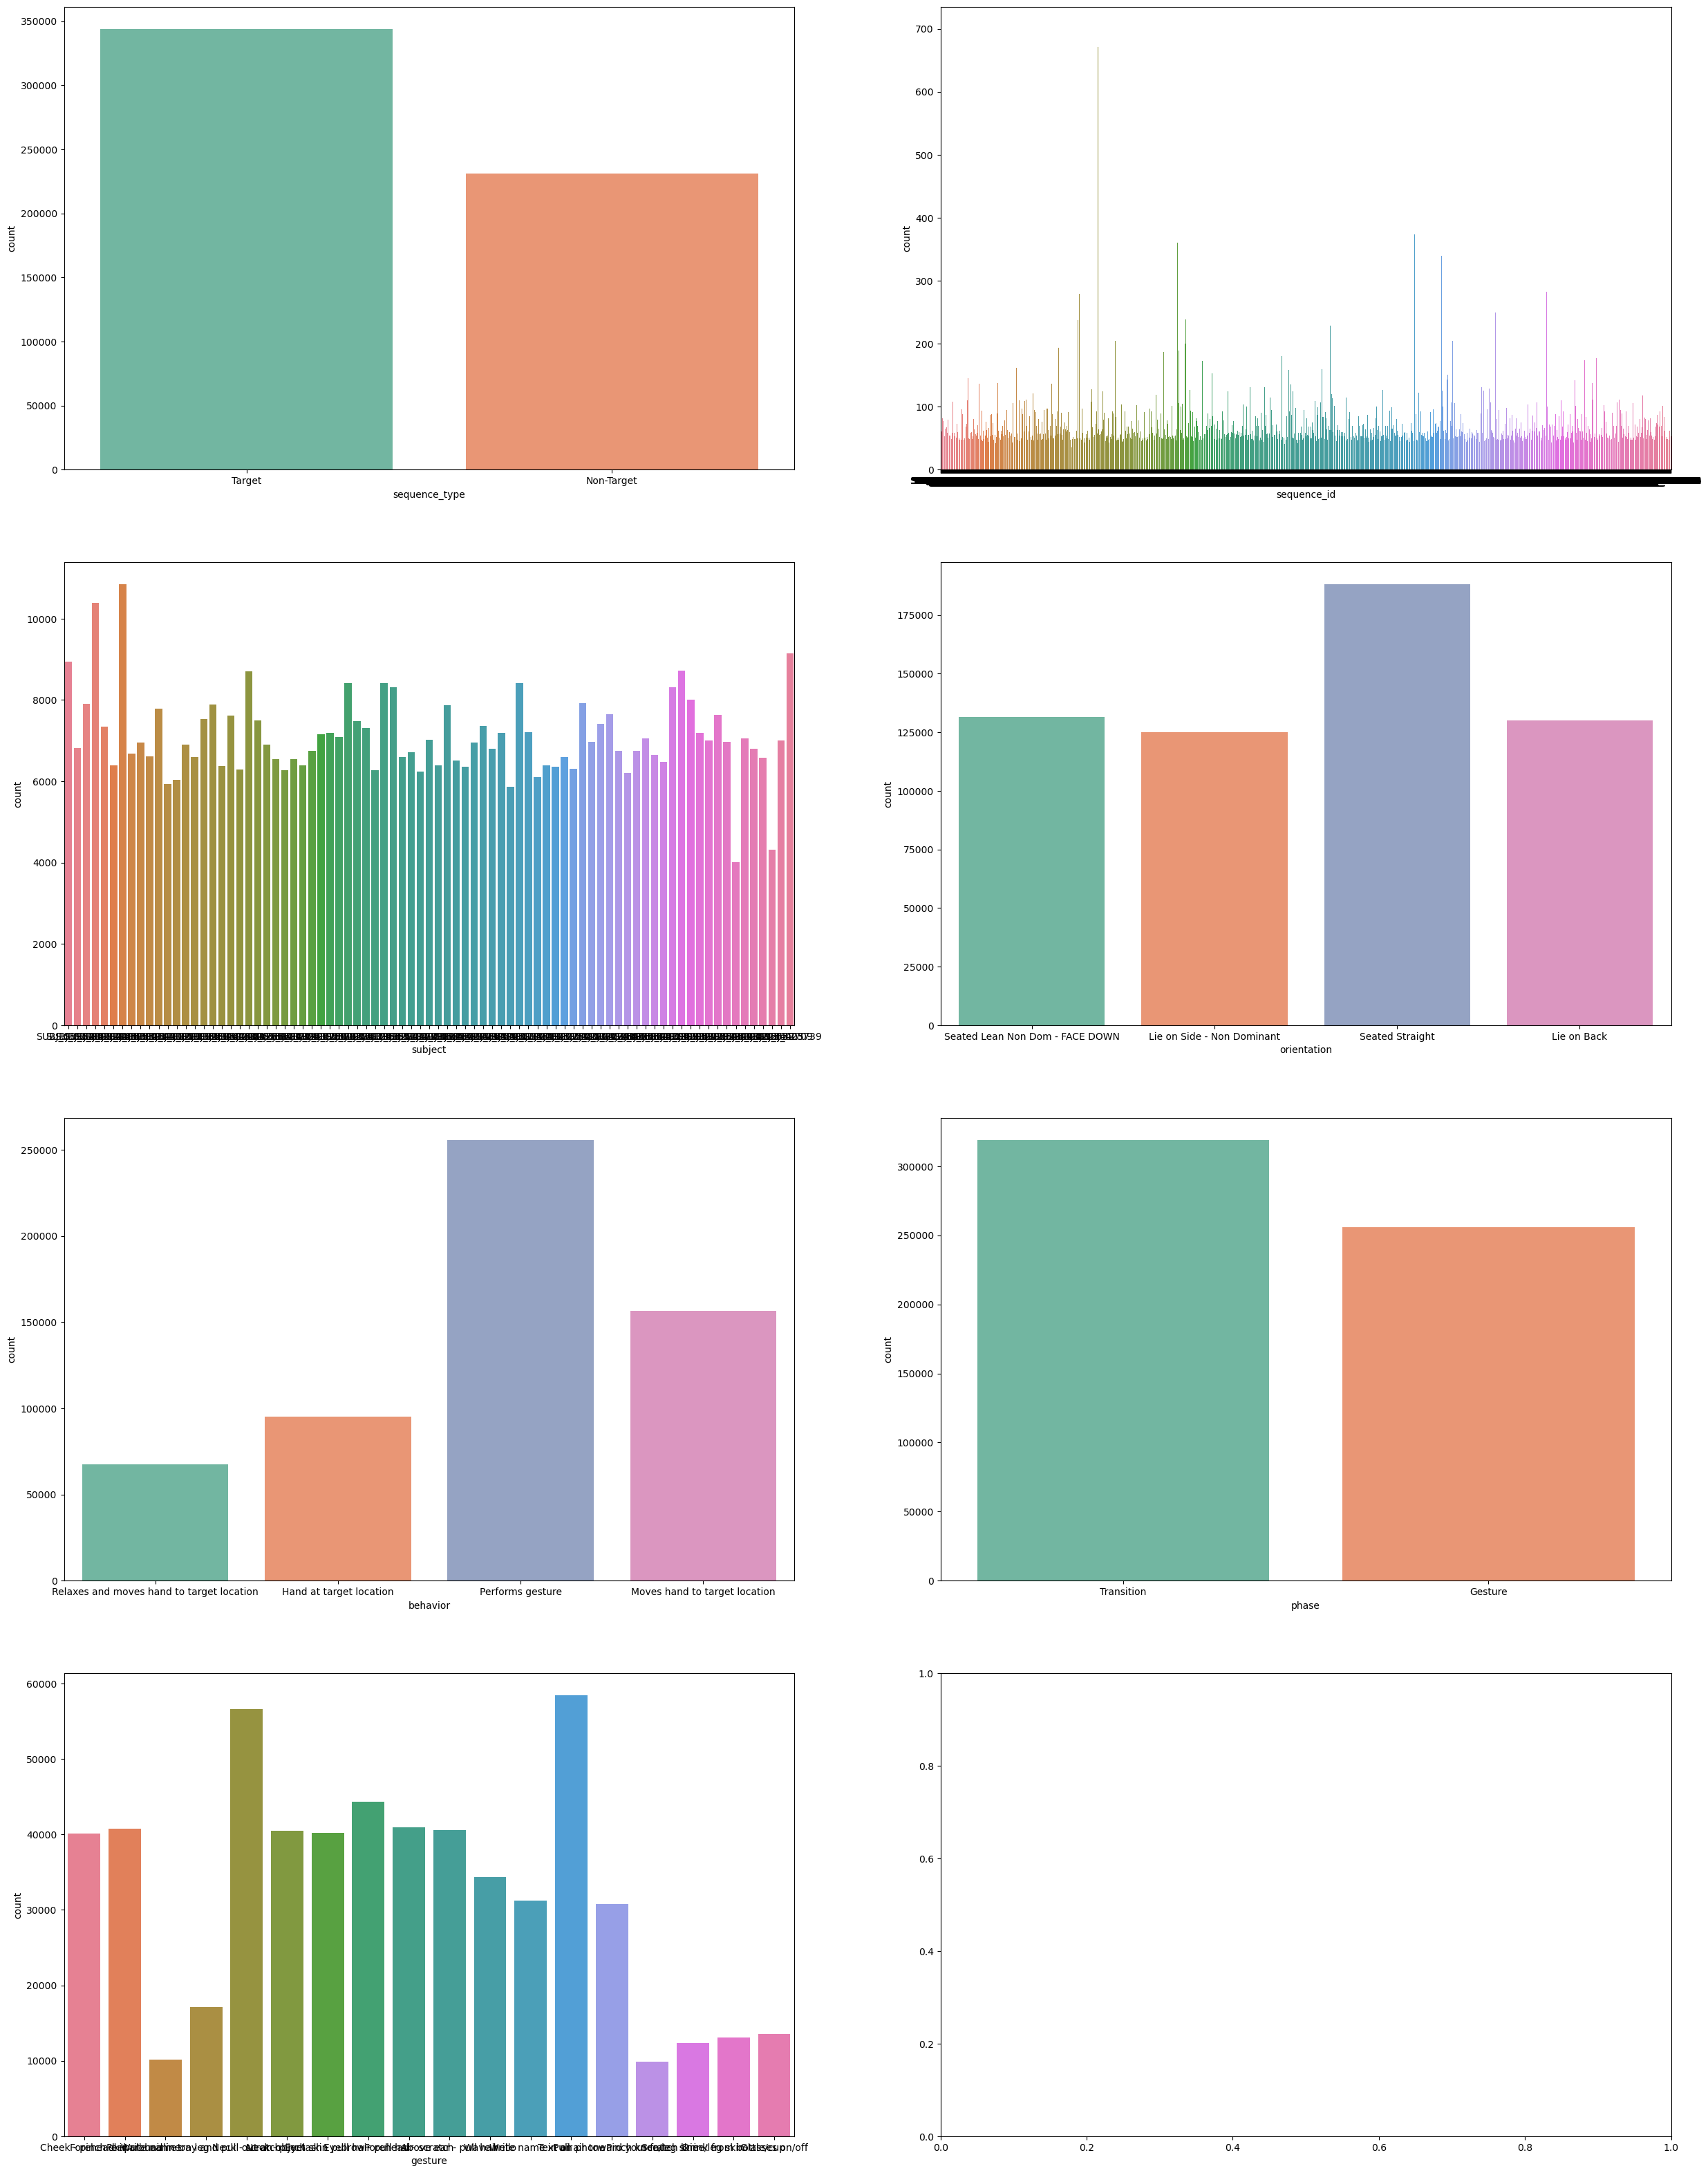

In [211]:
# Distribution of objective columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 40))

for i, col in enumerate(columns_obj[1:]):
    r = i // 2
    c = i % 2
    sns.countplot(data=df, x=col, ax=axes[r][c], hue=col)

In [195]:
# Numeric columns
columns_num = df.describe().columns
len(columns_num)

333

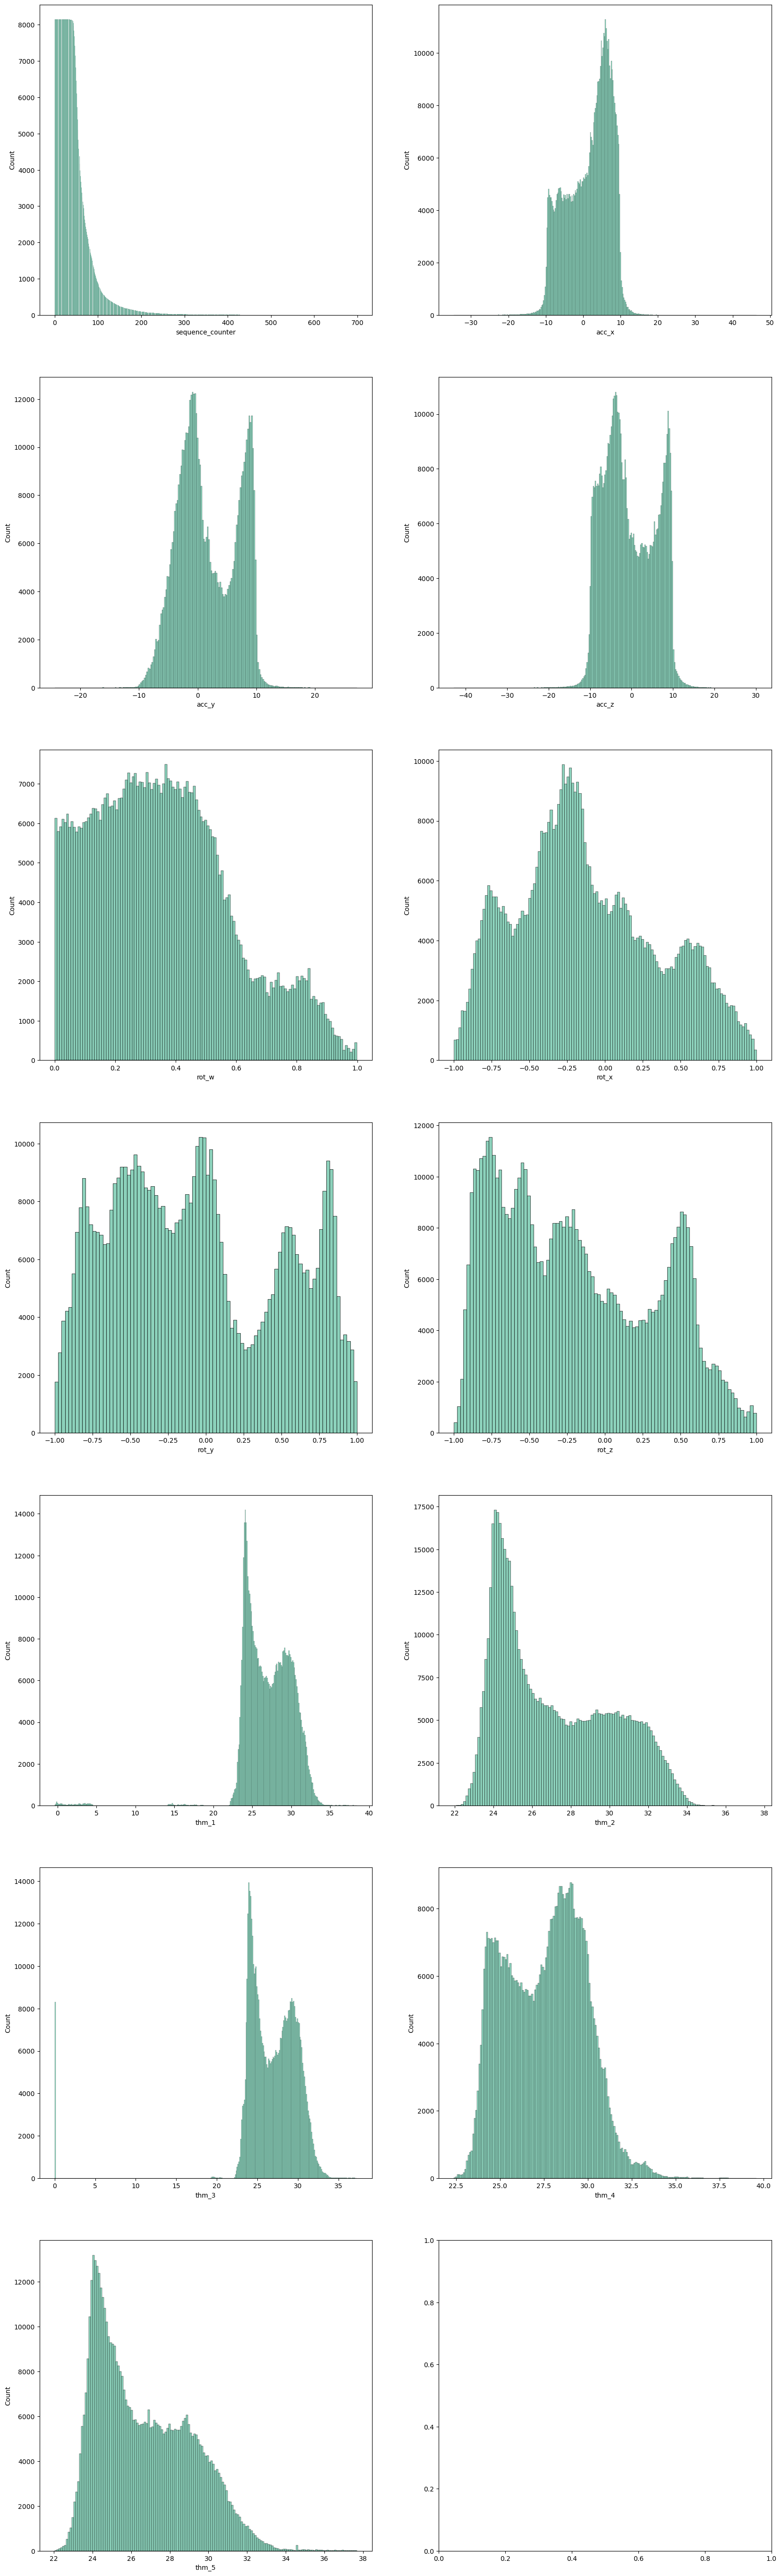

In [215]:
# Distribution of numeric columns except tof
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 70))

for i, col in enumerate(columns_num[:13]):
    r = i // 2
    c = i % 2
    sns.histplot(data=df, x=col, ax=axes[r][c])

- Unusually low values in 'thm_1' and 'thm_3'

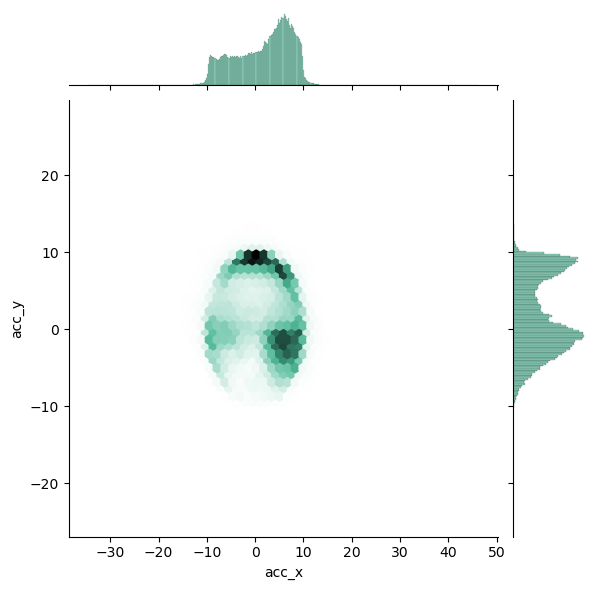

In [220]:
sns.jointplot(data=df, x='acc_x', y='acc_y', kind='hex')

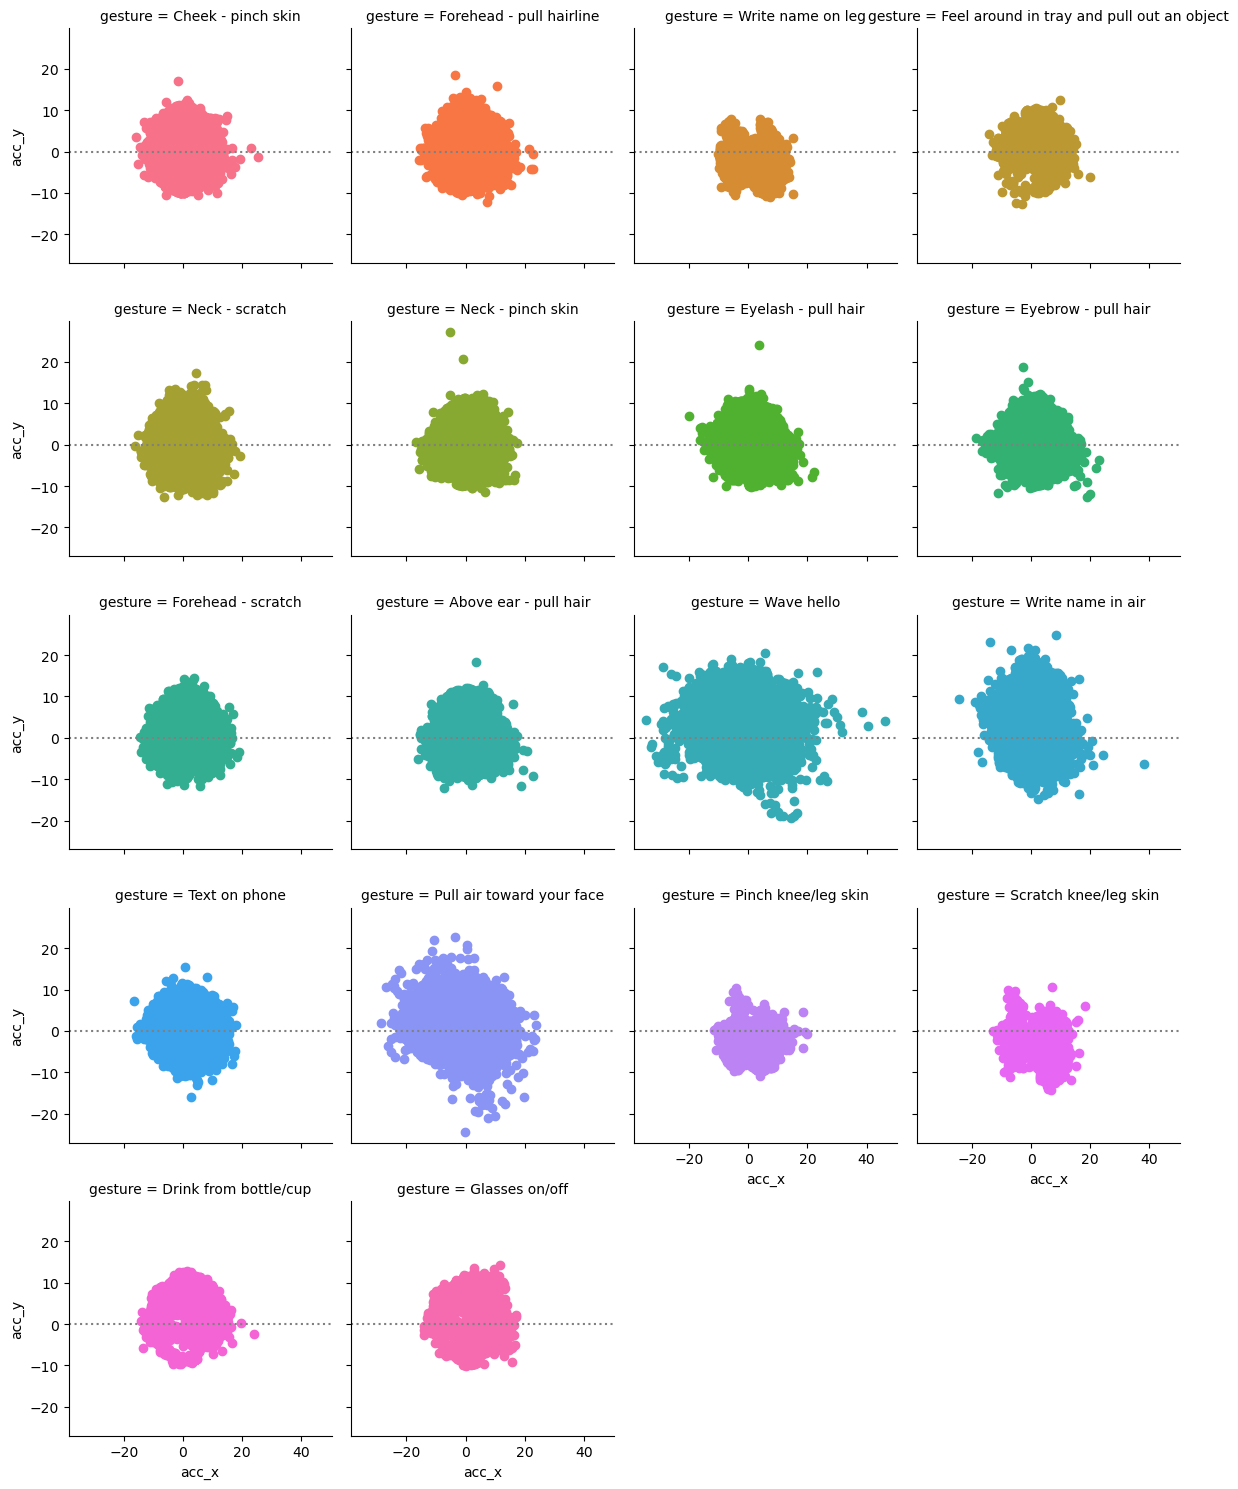

In [191]:
grid = sns.FacetGrid(df, col='gesture', hue='gesture', col_wrap=4)
grid.refline(y=0, linestyle=':')
grid.map(plt.scatter, 'acc_x', 'acc_y')

### Null values

In [78]:
# Other columns have values where 'rot_[w/x/y/z]' is null
df_rot_null = df[df[['rot_w', 'rot_x', 'rot_y', 'rot_z']].isnull().any(axis=1)]
df_rot_null.isnull().sum().sort_values(ascending=False)

rot_w        3692
rot_x        3692
rot_z        3692
rot_y        3692
tof_4_v21       0
             ... 
tof_2_v30       0
tof_2_v29       0
tof_2_v28       0
tof_2_v27       0
tof_5_v63       0
Length: 341, dtype: int64

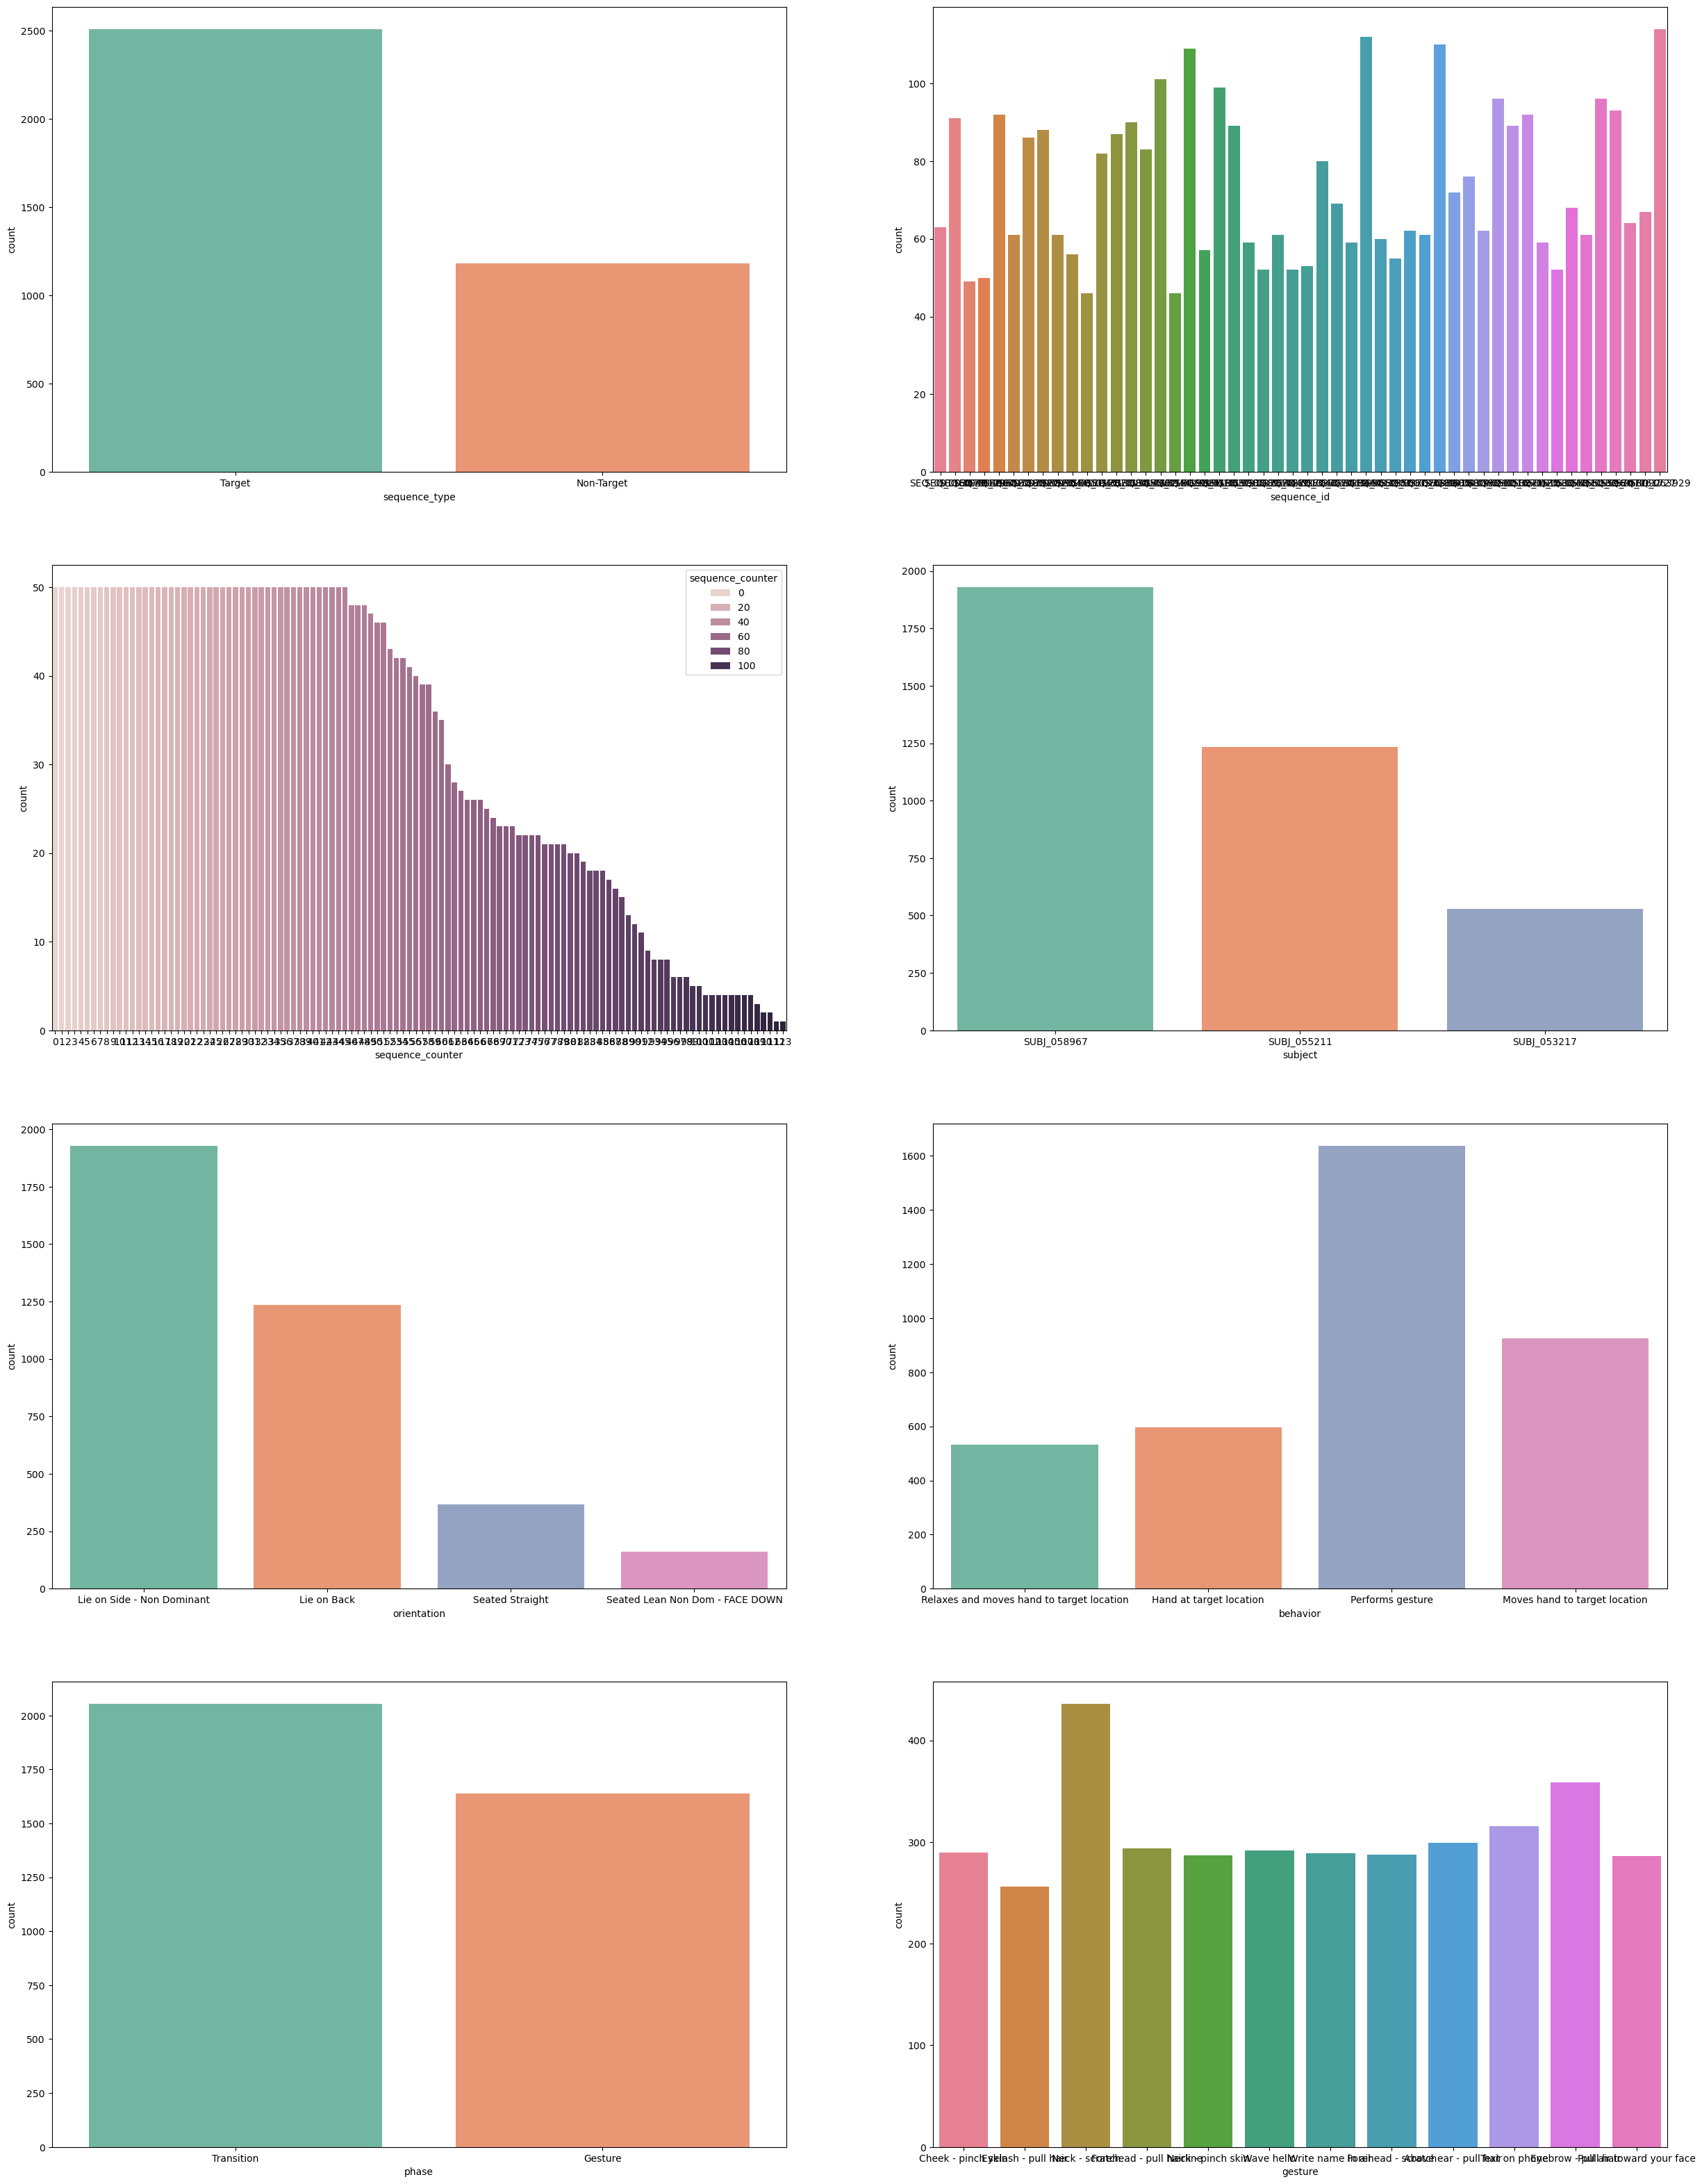

In [31]:
df_rot_null.iloc[:, 1:9]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 40))

for i, col in enumerate(df_rot_null.iloc[:, 1:9].columns):
    r = i // 2
    c = i % 2
    sns.countplot(data=df_rot_null, x=col, ax=axes[r][c], hue=col)

In [82]:
df_rot_null['subject'].unique()

array(['SUBJ_058967', 'SUBJ_055211', 'SUBJ_053217'], dtype=object)

In [246]:
# All null rot_[w/x/y/z] of 'SUBJ_058967' is from 'orientation'=='Lie on Side - Non Dominant'
df_058967 = df.loc[df['subject'] == 'SUBJ_058967', ['sequence_type', 'orientation', 'behavior', 'phase', 'gesture', 'rot_w', 'rot_x', 'rot_y', 'rot_z']]
df_058967['rot_null'] = df_058967[['rot_w', 'rot_x', 'rot_y', 'rot_z']].isnull().any(axis=1)
df_058967.groupby(['orientation'])['rot_null'].sum()

orientation
Lie on Back                           0
Lie on Side - Non Dominant         1929
Seated Lean Non Dom - FACE DOWN       0
Seated Straight                       0
Name: rot_null, dtype: int64

In [248]:
# All null rot_[w/x/y/z] of 'SUBJ_055211' is from 'orientation'=='Lie on Back'
df_055211 = df.loc[df['subject'] == 'SUBJ_055211', ['sequence_type', 'orientation', 'behavior', 'phase', 'gesture', 'rot_w', 'rot_x', 'rot_y', 'rot_z']]
df_055211['rot_null'] = df_055211[['rot_w', 'rot_x', 'rot_y', 'rot_z']].isnull().any(axis=1)
df_055211.groupby(['orientation', 'gesture'])['rot_null'].sum()

orientation                      gesture                                   
Lie on Back                      Above ear - pull hair                         115
                                 Cheek - pinch skin                            141
                                 Eyebrow - pull hair                           181
                                 Eyelash - pull hair                           104
                                 Forehead - pull hairline                      137
                                 Forehead - scratch                            139
                                 Neck - pinch skin                             144
                                 Neck - scratch                                138
                                 Pull air toward your face                       0
                                 Text on phone                                 135
                                 Wave hello                                      0
           

In [258]:
# All null rot_[w/x/y/z] of 'SUBJ_053217'
df_053217 = df.loc[df['subject'] == 'SUBJ_053217', ['sequence_type', 'orientation', 'behavior', 'phase', 'gesture', 'rot_w', 'rot_x', 'rot_y', 'rot_z']]
df_053217['rot_null'] = df_053217[['rot_w', 'rot_x', 'rot_y', 'rot_z']].isnull().any(axis=1)
df_053217.groupby(['orientation', 'gesture'])['rot_null'].sum()

orientation                      gesture                                   
Seated Lean Non Dom - FACE DOWN  Above ear - pull hair                           0
                                 Cheek - pinch skin                              0
                                 Eyebrow - pull hair                             0
                                 Eyelash - pull hair                             0
                                 Forehead - pull hairline                        0
                                 Forehead - scratch                              0
                                 Neck - pinch skin                               0
                                 Neck - scratch                                161
                                 Pinch knee/leg skin                             0
                                 Scratch knee/leg skin                           0
                                 Text on phone                                   0
           